In [11]:
from Bio import Phylo
from io import StringIO

In [12]:
treedata = '((2[&type="dormant"]:1.8538)5[&type="active"]:0.014478,(((1[&type="active"]:0.069495,0[&type="active"]:0.069495)3[&type="active"]:1.04667)4[&type="dormant"]:0.03647)6[&type="active"]:0.715642)7[&type="active"]:0;'
handle = StringIO(treedata)
tree = Phylo.read(handle, 'newick', rooted=True)

In [13]:
tree.clade.clades[0]

Clade(branch_length=0.014478, comment='&type="active"', confidence=5)

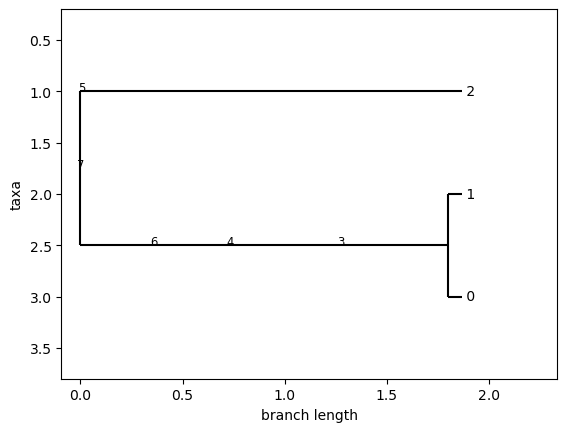

In [14]:
Phylo.draw(tree)

In [15]:
tree.clade

Clade(branch_length=0.0, comment='&type="active"', confidence=7)

In [16]:
def conf_to_names (tree):
  clades = [tree.clade]
  while (clades):
    nxt = []
    for c in clades:
      if c.confidence and not c.name:
        c.name=str(c.confidence)
        c.confidence=None
        if c.clades:
          nxt += c.clades
    clades = nxt

In [17]:
conf_to_names(tree)

In [18]:
import numpy as np
from treetime.seqgen import SeqGen
from treetime import GTR
from treetime.gtr import avg_transition

In [19]:
pi = np.array([0.25, 0.25, 0.25, 0.25])
gtr = GTR.standard(model='hky', mu=1.0, pi=pi, kappa=0.1)
gtr_d = GTR.standard(model='hky', mu=0.1, pi=pi, kappa=0.1)

In [20]:
sq = SeqGen(5, tree=tree, gtr=gtr, gtr_d = gtr_d)
sq.evolve_sb()
# print(sq.aln)


0.00	-TreeAnc: set-up

0.00	-SequenceData: loaded alignment.


In [21]:
aln = sq.get_aln(True)
print(aln)

Alignment with 8 rows and 5 columns
GTAAC 7
GTAAC 5
GTTAC 2
AGAAA 6
AGAAA 4
TGAGG 3
TGAGG 1
TCAGG 0
